In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loabding Dataset
df=pd.read_csv(r"E:\Praxis\Project\Bank Marketing\bank-full.csv", sep =";")
# First Five Observations
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Data Understanding

In [3]:
# Checking shape of the dataset
df.shape

(45211, 17)

In [4]:
# Bsic description of Dataset
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [5]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# Finding categorical variables
categorical_variables = [var for var in df.columns if df[var].dtype=='object']
print('There are {} categorical variables'.format(len(categorical_variables)))
print('--'*45)
print(categorical_variables)

There are 10 categorical variables
------------------------------------------------------------------------------------------
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [7]:
# Finding numerical variables
numerical_variables = [var for var in df.columns if df[var].dtype=='int64']
print('There are {} numerical variables'.format(len(numerical_variables)))
print('--'*45)
print(numerical_variables)

There are 7 numerical variables
------------------------------------------------------------------------------------------
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [8]:
# Checking duplicated values in dataset
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


In [9]:
# Checking for number of null values in dataset
count_null_df=pd.DataFrame({'columns':df.columns,'number_of_nulls_values':df.isna().sum()})
count_null_df.set_index('columns').sort_values(by='number_of_nulls_values', ascending = False)

,number_of_nulls_values
columns,
age,0
day,0
poutcome,0
previous,0
pdays,0
campaign,0
duration,0
month,0
contact,0


In [10]:
#Count of unique values in each column  
for var in df.columns:
    print(df[var].value_counts())
    print('--'*45)

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64
------------------------------------------------------------------------------------------
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
------------------------------------------------------------------------------------------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
------------------------------------------------------------------------------------------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
------------------------------------------------------------------------------------------
no 

Observations :

Dataset having 45211 observations and 17 columns.
In the dataset, there are object and int64 dtypes features present.
job, marital, education, default, housing, loan, contact, month, poutcome, and y are among the 10 categorical variables in this dataset.
There are 7 numerical variables in this dataset: age, balance, day, duration, campaign, pdays, and previous.
Dataset having 0 duplicated values.
There are no null/missing values in the dataset.
The unknown values for features job, education, contact, and poutcome are 288; 1857; 13020; and 36959, respectively. Unknown values can be treated as null since they are not defined and can be taken out of features by treatment.

# Feature Engineering

In [11]:
# Replacing the unknown values with null across all the dataset
df = df.replace('unknown', np.nan)

In [12]:
#checking category of features whoes having null values

print('Missing Values by Count: \n\n',
      df.isnull().sum().sort_values(ascending=False),'\n\nMissing Values by %:\n\n',
      df.isnull().sum().sort_values(ascending=False)/df.shape[0] * 100)

Missing Values by Count: 

 poutcome     36959
contact      13020
education     1857
job            288
month            0
previous         0
pdays            0
campaign         0
duration         0
age              0
day              0
loan             0
housing          0
balance          0
default          0
marital          0
y                0
dtype: int64 

Missing Values by %:

 poutcome     81.747805
contact      28.798301
education     4.107407
job           0.637013
month         0.000000
previous      0.000000
pdays         0.000000
campaign      0.000000
duration      0.000000
age           0.000000
day           0.000000
loan          0.000000
housing       0.000000
balance       0.000000
default       0.000000
marital       0.000000
y             0.000000
dtype: float64


In [13]:
# Dropping variables having more than 50% null values
df.drop(columns='poutcome', inplace=True)

In [14]:
# Replacing null values with the most frequent value in a variable
df['contact']=df['contact'].fillna(df['contact'].mode()[0])
df['education']=df['education'].fillna(df['education'].mode()[0])
df['job']=df['job'].fillna(df['job'].mode()[0])

In [15]:
# Verify for null values are removed
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  y          45211 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


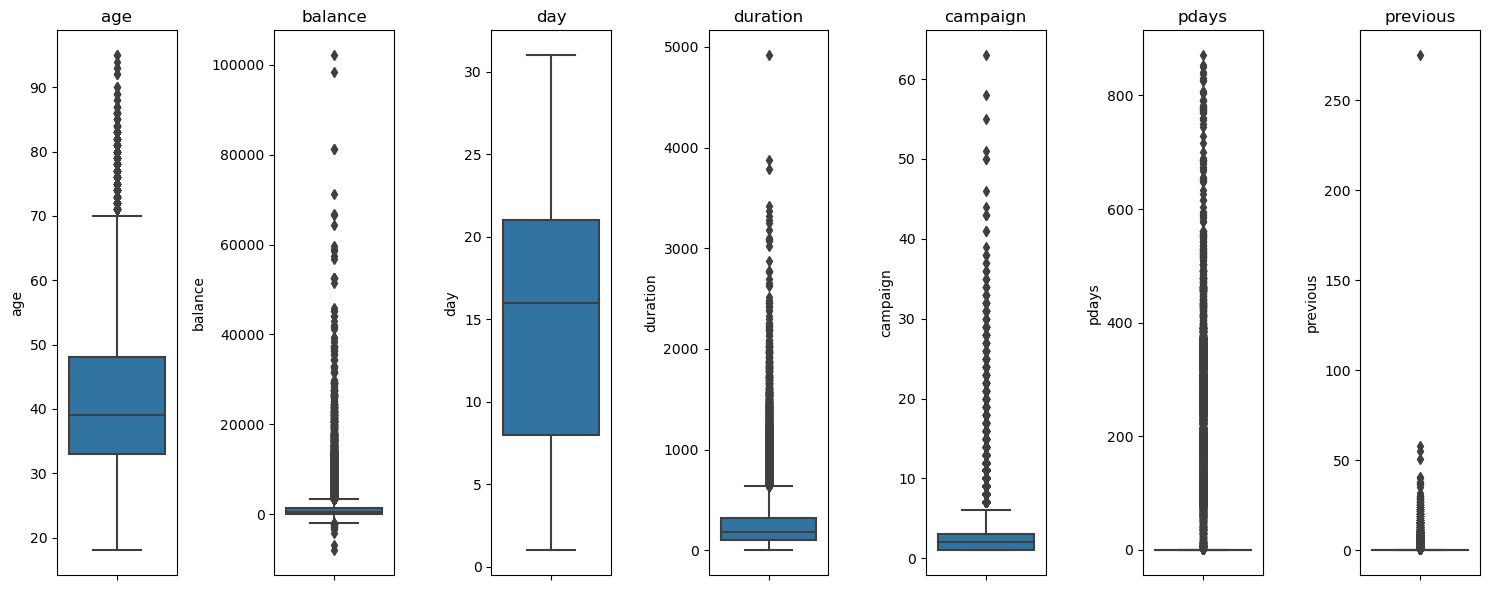

In [17]:
# Box plot to visualizing outliers
fig, axes = plt.subplots(1,len(numerical_variables), figsize=(15, 6))
axes = axes.flatten()

for i, var in enumerate(numerical_variables):
    sns.boxplot(y=df[var], ax=axes[i])
    axes[i].set_title(var)

plt.tight_layout()
plt.show()
  

In [18]:
df.drop(columns=['pdays','previous'], inplace=True)

In [19]:
# Categorical variables after data cleaning
categorical_variables = [var for var in df.columns if df[var].dtype=='object']
print('There are {} categorical variables'.format(len(categorical_variables)))
print('--'*45)
print(categorical_variables)

There are 9 categorical variables
------------------------------------------------------------------------------------------
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'y']


In [20]:
# Numerical variables after cleaning
numerical_variables = [var for var in df.columns if df[var].dtype=='int64']
print('There are {} numerical variables'.format(len(numerical_variables)))
print('--'*45)
print(numerical_variables)

There are 5 numerical variables
------------------------------------------------------------------------------------------
['age', 'balance', 'day', 'duration', 'campaign']


In [21]:
#Replacing outliers by upper limit and lower limit
for var in numerical_variables:
    Q1= df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    df.loc[(df[var] > upper_limit),var] = upper_limit
    df.loc[(df[var] < lower_limit),var] = lower_limit

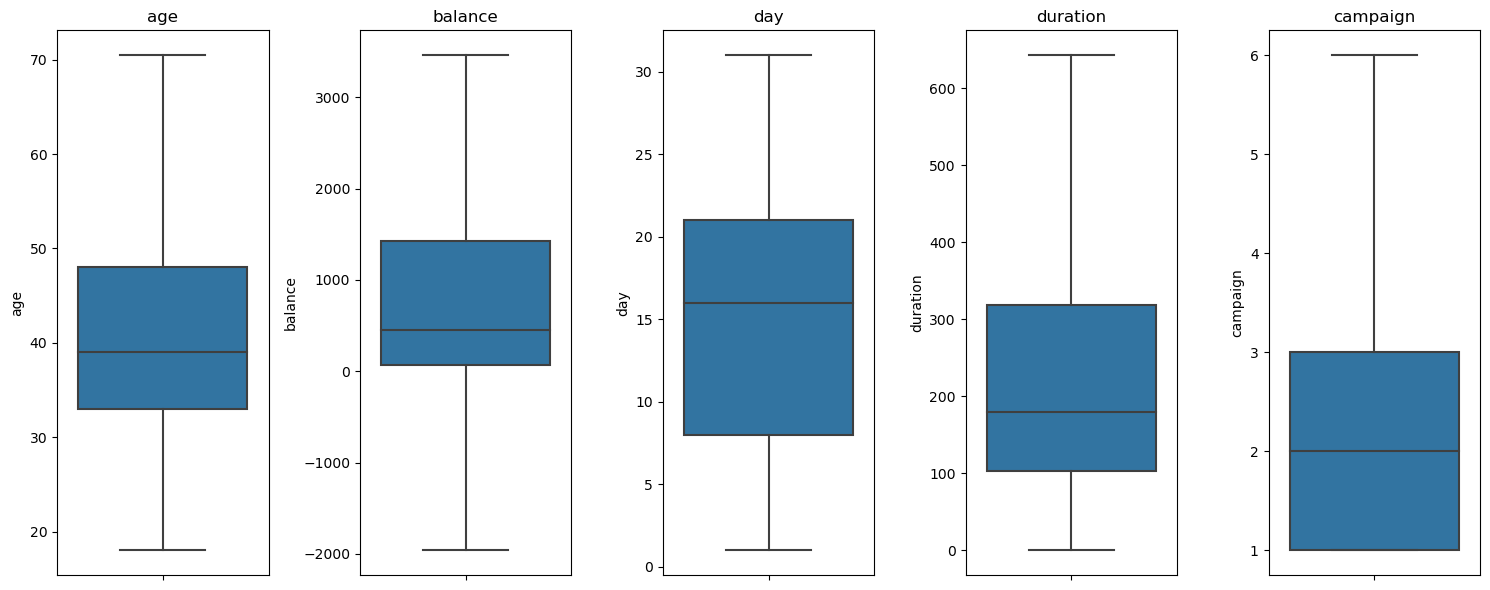

In [22]:
# Box Plot after handing outliers
fig, axes = plt.subplots(1, len(numerical_variables), figsize=(15, 6))
axes = axes.flatten()

for i, var in enumerate(numerical_variables):
    sns.boxplot(y=df[var], ax=axes[i])
    axes[i].set_title(var)

plt.tight_layout()
plt.show()
  

Poutcome, contact, education, and job all have null values of 81.45%, 28.80%, 4.11%, and 0.64%, respectively.
Replaced null values for features like contact, education, and job with their modes. In addition, removed features with more than 50% null values because they were worthless and hindered model performance.
The variables age, balance, duration, campaign, pdays, and previous contain outliers. pdays, and previous have a flat interquartile range; it is best to remove those columns. Variable day does not have any outliers.
Replaced null values with their equivalent modes for features like contact, education, and employment. Additionally, features with more than 50% null values were eliminated because they were useless and negatively impacted model performance.
Outliers are treated using the interquartile range for the variables age, balance, duration, campaign, p-days, and previous. It is better to eliminate the columns pdays and previous because they have an interquartile range which is flat.
No outliers exist on a variable day.

# EDA

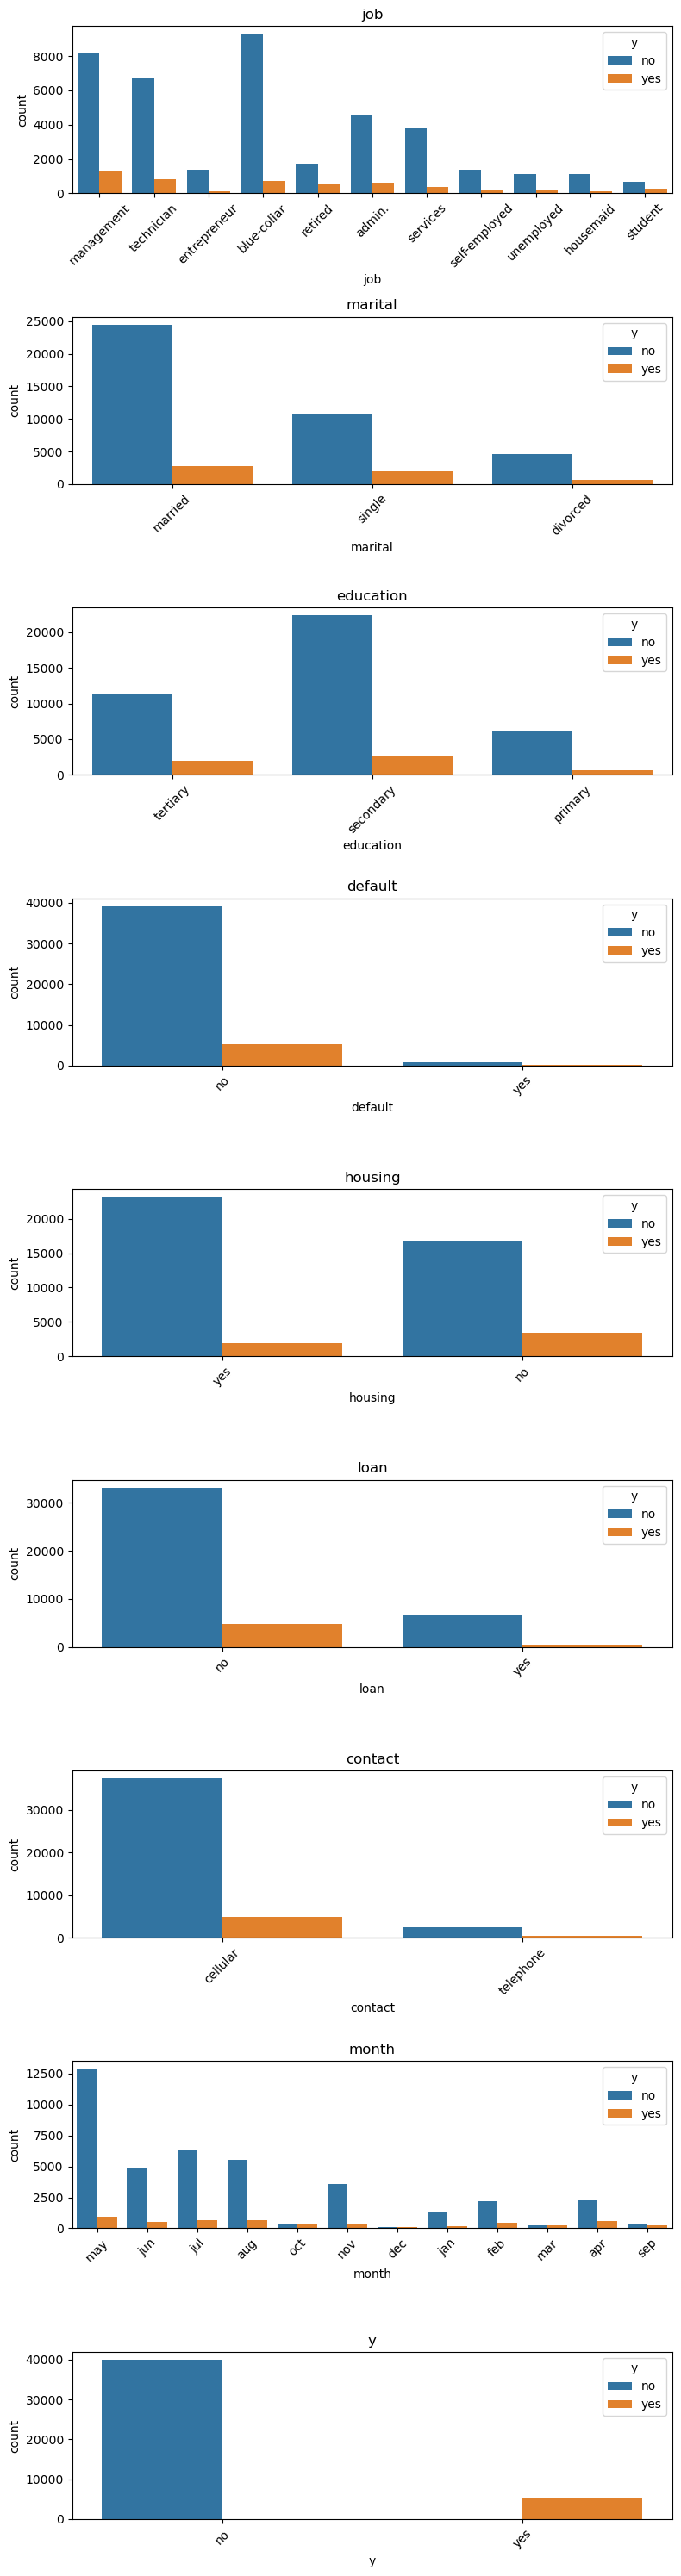

In [23]:
fig, axes = plt.subplots(len(categorical_variables), 1, figsize=(8, 30))
axes = axes.flatten()

for i, var in enumerate(categorical_variables):
    sns.countplot(data=df, x=var,hue=df['y'], ax=axes[i])
    axes[i].set_title(var)
    axes[i].tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()

__________________________________________________________________________________________


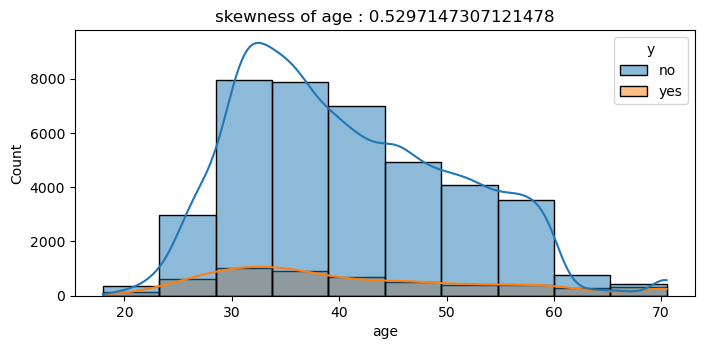

__________________________________________________________________________________________


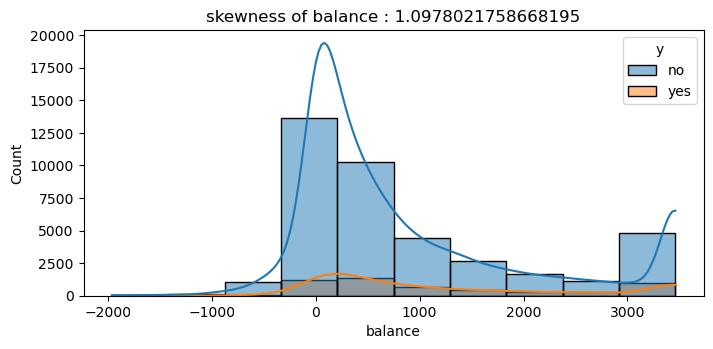

__________________________________________________________________________________________


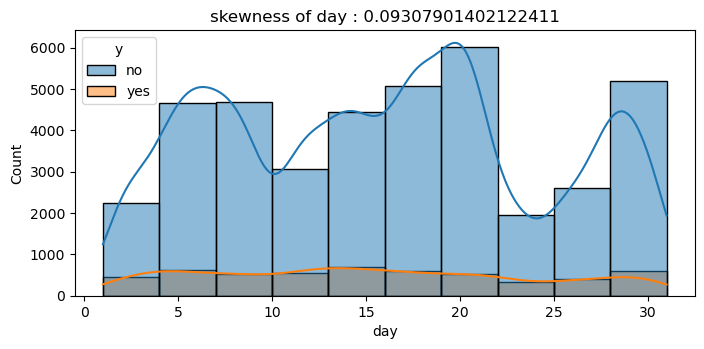

__________________________________________________________________________________________


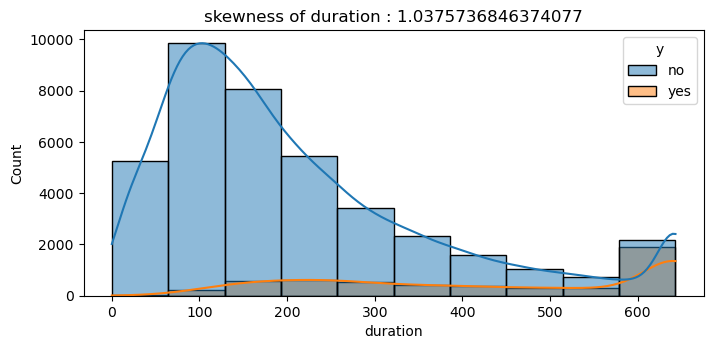

__________________________________________________________________________________________


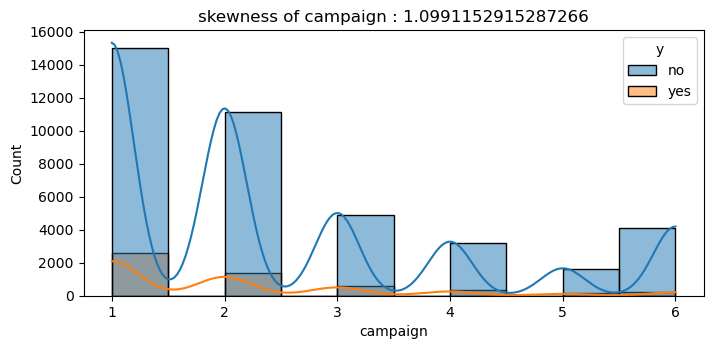

In [24]:
for var in numerical_variables:
    plt.figure(figsize=(8,20))
    plt.subplot(len(numerical_variables),1,1)
    ax=sns.histplot(data=df,x=df[var],kde=True,hue=df['y'],bins=10)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*45)
    plt.show()

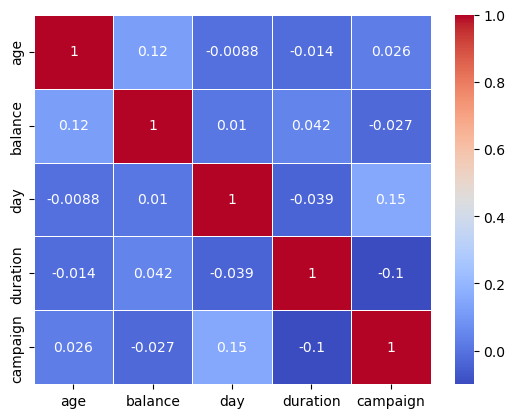

In [25]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',linewidths=0.5)
plt.show()

With only a few categories for the categorical variables marital, education, default, housing, loan, contact, and y, label encoding can be applied. One hot encoding can be used for the categorical variables job and month, as they have numerous categories.

In [26]:
for var in df.columns:
    print(var,'\t',df[var].dtypes,'\t',df[var].nunique())
    print('--'*45)

age 	 float64 	 54
------------------------------------------------------------------------------------------
job 	 object 	 11
------------------------------------------------------------------------------------------
marital 	 object 	 3
------------------------------------------------------------------------------------------
education 	 object 	 3
------------------------------------------------------------------------------------------
default 	 object 	 2
------------------------------------------------------------------------------------------
balance 	 int64 	 4163
------------------------------------------------------------------------------------------
housing 	 object 	 2
------------------------------------------------------------------------------------------
loan 	 object 	 2
------------------------------------------------------------------------------------------
contact 	 object 	 2
---------------------------------------------------------------------------------------

In [27]:
#One hot encoding for variable job and month
df=pd.get_dummies(df, columns=['job', "month"], prefix=["job", "month"], drop_first=True)

In [28]:
# Mapping the categorical variables whoes having limited categories
df['marital'] = df['marital'].map({'single':0,'married':1,'divorced':2})
df['education'] = df['education'].map({'secondary':0,'tertiary':1, 'primary':2})
df['default'] = df['default'].map({'yes':1,'no':0})
df['housing'] = df['housing'].map({'yes':1,'no':0})
df['loan'] = df['loan'].map({'yes':1,'no':0})
df['contact'] = df['contact'].map({'cellular':1,'telephone':0})
df['y'] = df['y'].map({'yes':1,'no':0})

In [29]:
pd.set_option('display.max_columns', None)
df.head()

,age,marital,education,default,balance,housing,loan,contact,day,duration,campaign,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58.0,1,1,0,2143,1,0,1,5.0,261,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,44.0,0,0,0,29,1,0,1,5.0,151,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33.0,1,0,0,2,1,1,1,5.0,76,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,47.0,1,0,0,1506,1,0,1,5.0,92,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,33.0,0,0,0,1,0,0,1,5.0,198,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [30]:
# Checking basic information of dataset after feature encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                45211 non-null  float64
 1   marital            45211 non-null  int64  
 2   education          45211 non-null  int64  
 3   default            45211 non-null  int64  
 4   balance            45211 non-null  int64  
 5   housing            45211 non-null  int64  
 6   loan               45211 non-null  int64  
 7   contact            45211 non-null  int64  
 8   day                45211 non-null  float64
 9   duration           45211 non-null  int64  
 10  campaign           45211 non-null  int64  
 11  y                  45211 non-null  int64  
 12  job_blue-collar    45211 non-null  uint8  
 13  job_entrepreneur   45211 non-null  uint8  
 14  job_housemaid      45211 non-null  uint8  
 15  job_management     45211 non-null  uint8  
 16  job_retired        452

<Axes: xlabel='y', ylabel='count'>

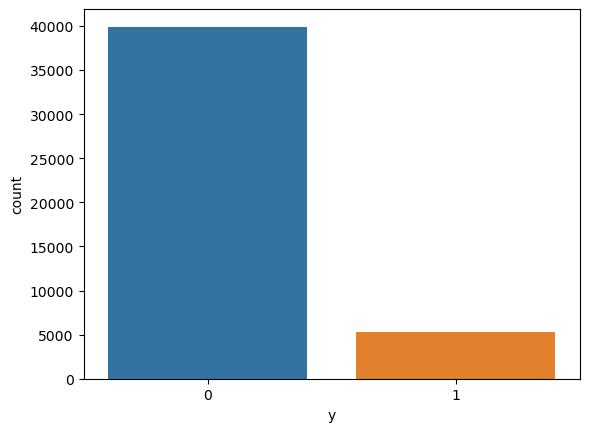

In [31]:
#Seperating dependent and independent variables
y=df[['y']]
X=df.drop('y',axis=1)
sns.countplot(x=df['y'])

<Axes: xlabel='y', ylabel='count'>

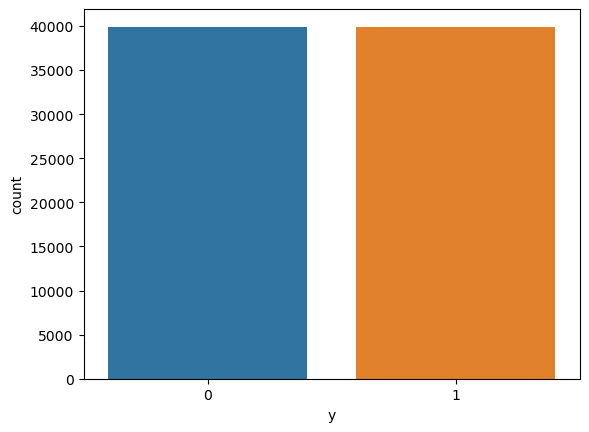

In [46]:
#Balancing data
from imblearn.over_sampling import SMOTE

# Initialize the SMOTE oversampler
smote = SMOTE(random_state=42)

# Apply SMOTE to create synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Now, X_resampled and y_resampled contain the balanced dataset
sns.countplot(x=y_resampled['y'])

In [47]:
#Selection of best 10 features
## Apply SelectKBest with mutual_info_classif to select top k features
from sklearn.feature_selection import SelectKBest, mutual_info_classif
k = 10  # Number of top features to select
selector = SelectKBest(mutual_info_classif, k=k)
selector.fit(X_resampled, y_resampled)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names =X_resampled.columns[selected_feature_indices]

# Subset the feature matrix with the selected features
X_top = X_resampled[selected_feature_names]


In [48]:
#Top 10 features
X_top

,age,marital,balance,housing,loan,day,duration,campaign,job_blue-collar,month_may
0,58.000000,1,2143,1,0,5.000000,261,1,0,1
1,44.000000,0,29,1,0,5.000000,151,1,0,1
2,33.000000,1,2,1,1,5.000000,76,1,0,1
3,47.000000,1,1506,1,0,5.000000,92,1,1,1
4,33.000000,0,1,0,0,5.000000,198,1,1,1
...,...,...,...,...,...,...,...,...,...,...
79839,28.529988,0,1589,0,0,7.410037,255,1,0,0
79840,29.158809,0,84,0,0,10.353775,643,1,0,0
79841,29.000000,0,206,0,0,4.447113,643,1,0,0
79842,39.010553,1,465,1,0,20.010553,643,1,0,0


In [49]:
#Train-Test splitting with resampled data
from sklearn.model_selection import train_test_split

# X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [50]:
#Train-Test splitting of top 10 with resampled data
X_top_train, X_top_test, y_top_train, y_top_test = train_test_split(X_top, y_resampled, test_size=0.2, random_state=42)

In [51]:
#Normalizing the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
#Normalizing the data for top 10
scaler = MinMaxScaler()
X_top_train = scaler.fit_transform(X_top_train)
X_top_test = scaler.transform(X_top_test)

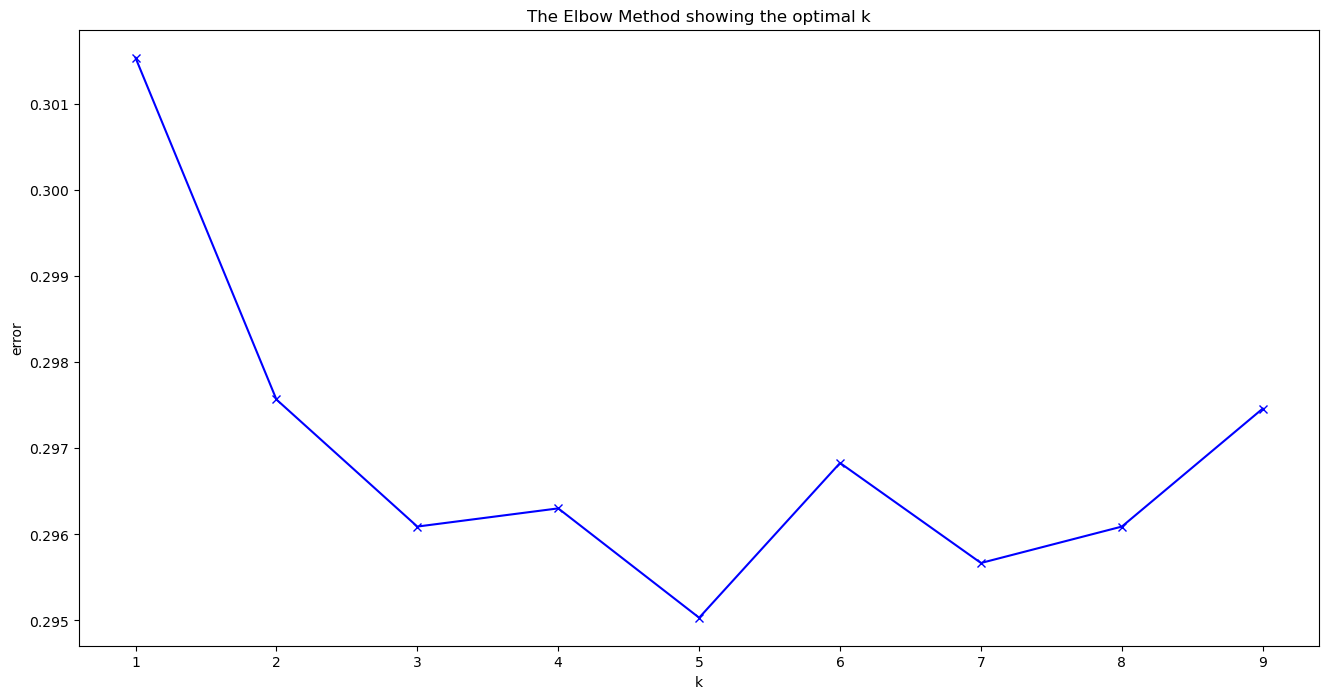

In [55]:
#Optimized value of k
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
error = []
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    y_pred_KNN = knn.predict(X_test)
    error.append(np.sqrt(mean_squared_error(y_test, y_pred_KNN)))

plt.figure(figsize=(16,8))
plt.plot(range(1, 10), error, 'bx-')
plt.xlabel('k')
plt.ylabel('error')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Accuracy: 0.9129563529338093
Precision: 0.9203528670447385
Recall: 0.9059670016127032
F1 Score: 0.9131032758189547


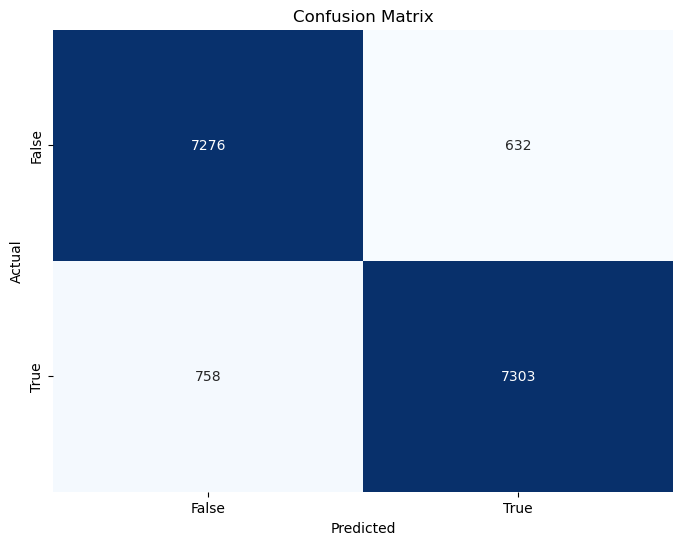

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [64]:
### Applying on all features.
from sklearn.tree import DecisionTreeClassifier, plot_tree


# Create the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

'''
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=True, filled=True, rounded=True)
plt.show()
'''

Accuracy: 0.9079466466278414
Precision: 0.9047034262556797
Recall: 0.913906463217963
F1 Score: 0.9092816588496667


'\nplt.figure(figsize=(12, 8))\nplot_tree(clf, feature_names=X.columns, class_names=True, filled=True, rounded=True)\nplt.show()\n'

In [61]:
from sklearn.naive_bayes import MultinomialNB

# Create the Naive Bayes Classifier (MultinomialNB is used for text classification)
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8794539420126495
Precision: 0.9104896976184105
Recall: 0.8441880659967745
F1 Score: 0.876086256839395
